# AAI614: Data Science & its Applications

*Notebook 4.1: Graph Analytics with cuGraph and TIGER*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%204/Notebook4.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




The study of network robustness is critical to the understanding of complex interconnected systems. For example, consider an example of a power grid network that is susceptible to both natural failures and targeted attacks. A natural failure occurs when a single power substation fails due to erosion of parts or natural disasters. However, when one substation fails, additional load is routed to alternative substations, potentially causing a series of cascading failures. Not all failures originate from natural causes, some come from targeted attacks, such as enemy states hacking into the grid to sabotage key equipment to maximally damage the operations of the electrical grid. A natural counterpart to network robustness is vulnerability, defined as measure of a network’s susceptibility to the dissemination of entities across the network, such as how quickly a virus spreads across a computer network.

In this lab, we show how to use [cuGraph](https://github.com/rapidsai/cugraph) and [TIGER](https://github.com/safreita1/TIGER) to conduct state-of-the-art GPU accelerated graph vulnerability and robustness analysis. Specifically, we will look at how to:

- *Quantify network vulnerability and robustness* (**Part 1**),
- *Simulate network attacks and cascading failures on networks* (**Part 2**)
- *Regulate the dissemination of computer virues on a network* (**Part 3**)

Lab Source: **NVIDIA**

## Setup
Lets begin by installing the following 2 libraries:

1.   Graph vulnerability and robustness analysis library: [TIGER](https://github.com/safreita1/TIGER)
2.   GPU acceleration library: [CuPy](https://github.com/cupy/cupy)


In [5]:
pip install graph-tiger

In [7]:
# This gets the RAPIDS-Colab install files and checks your GPU compatibility.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py


fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.8 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS via pip!  Please stand by, should be quick...
***********************************************************************



In [ ]:
# This updates the Colab environment and restarts the kernel.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)


Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda12x 12.2.0
Uninstalling cupy-cuda12x-12.2.0:
  Successfully uninstalled cupy-cuda12x-12.2.0
restarting Colab...


In [1]:
# Installing CondaColab.  (will restart your kernel again.)
import condacolab
condacolab.install()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:08
🔁 Restarting kernel...


In [1]:
# Checking Conda installation.
import condacolab
condacolab.check()


✨🍰✨ Everything looks OK!


In [2]:
# Installing RAPIDS. Replace "nightly" with "stable" if you prefer.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'


  Using cached pynvml-11.5.3-py3-none-any.whl.metadata (8.8 kB)
Using cached pynvml-11.5.3-py3-none-any.whl (53 kB)
Found existing installation: cffi 1.16.0
Uninstalling cffi-1.16.0:
  Successfully uninstalled cffi-1.16.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 11.6 MB/s eta 0:00:00
Installing RAPIDS Stable 23.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd8ed1ab_0          48 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    conda-24.7.1               |  py

In [4]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.7/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.7/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
PLEASE READ FOR 21.06
********************************************************************************************************
Another release, another script change.  We had to revise the script, which now:
1. Does a more comprehensive install
2. Includes BlazingSQL
3. is far easier for everyone to understand and maintain

The script will require you to add these 5 cells to your notebook.  We have also created a new startup template: 
https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9?usp=sharing

CHANGES T
CELL 1:
    # This get the RAPIDS-Colab install files and test check your GPU.  Run cells 1 and 2 only.
    # Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
    !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
    !python rapidsai-csp-utils/colab/env-check.py

CELL 2:
 

ValueError: '/usr/local/lib/python3.7/dist-packages' is not in list

That's it! Now we can run a variety of GPU acclerated graph mining algorithms.



## Part 1: Quantifing network vulnerability and robustness

While CPU calculations work well for sparse graphs, GPU acceleration significantly speeds-up analysis for dense graphs. To see this, lets run the code below that measures the robustness of a Barabási Albert (BA) graph at varying levels of density (i.e., number of edges per node).

In [6]:
!pip install stopit


  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=f512eddd7470d8ea0b300374a119b3cfcfb7354a93296688338b78160a153459
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [7]:
import time
from tqdm import tqdm

from graph_tiger.measures import run_measure
from graph_tiger.graphs import graph_loader

# controls graph density by varying the number of non-zeroes per row (i.e., number of edges per node in graph)
nnz_per_row = list(range(50, 501, 50))

cpu_times = []
gpu_times = []
for nnz in tqdm(nnz_per_row):
  graph = graph_loader(graph_type='BA', n=1000, m=nnz, seed=1)

  start_cpu = time.time()
  robustness_index = run_measure(graph, measure='average_vertex_betweenness', k=int(0.05 * len(graph)))
  end_cpu = time.time()

  start_gpu = time.time()
  robustness_index = run_measure(graph, measure='average_vertex_betweenness', k=12, use_gpu=True)  # ****** Replace with cuGraph version: https://docs.rapids.ai/api/cugraph/stable/api.html#module-cugraph.centrality.betweenness_centrality ******
  end_gpu = time.time()


  cpu_times.append(round(end_cpu - start_cpu, 2))
  gpu_times.append(round(end_gpu - start_gpu, 2))




100%|██████████| 10/10 [00:48<00:00,  4.81s/it]


Now lets plot the results (lower is better).

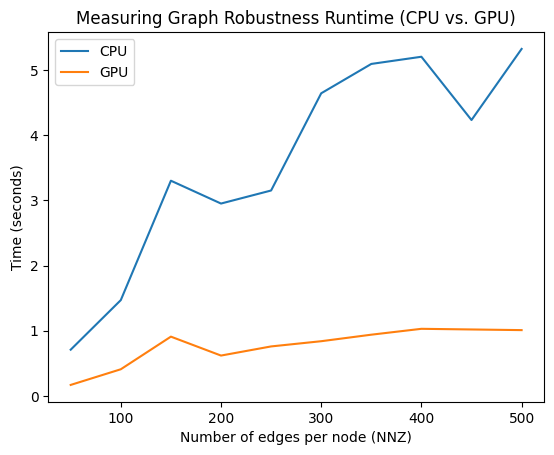

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(nnz_per_row, cpu_times, label='CPU')
plt.plot(nnz_per_row, gpu_times, label='GPU')
plt.xlabel('Number of edges per node (NNZ)')
plt.ylabel('Time (seconds)')
plt.title('Measuring Graph Robustness Runtime (CPU vs. GPU)')
plt.legend()
plt.show()

## Part 2. Simulating Cascading Failures in U.S. Electrical Grid
Cascading failures often arise as a result of natural failures or targeted attacks in a network. There are 3 main processes governing the network simulation:

- the **capacity** of each node (<img src="https://render.githubusercontent.com/render/math?math=c_v">) in the network, e.g., power substation capacity.

- the **load** of each node (<img src="https://render.githubusercontent.com/render/math?math=l_v">) in the network, e.g., power substation load level

- network **redundancy** (*r*) representing the amount of reserve capacity present in the network i.e., auxiliary support systems.

When a node is attacked it becomes "overloaded", causing it to fail and requiring the load be distributed to its neighbors. When defending a node, we increase it’s capacity to protect against attacks. With just these 3 parameters, we can setup a cascading failure simulation. Below, we show how to load a graph representing the U.S. electrical grid and setup the simulation parameters.

In [9]:
from graph_tiger.graphs import graph_loader

graph = graph_loader('electrical')

params = {
   'runs': 1,  # number of times to run the simulation
   'steps': 100,  # number of time steps to run each simulation
   'seed': 1,  # for repoducibility

   'l': 0.8,  # network load [0, 1]
   'r': 0.2,  # network redundancey [0, 1]
   'c': int(0.1 * len(graph)),  # load capacity approximation

   'robust_measure': 'largest_connected_component',  # measure of network health
}

### Setting up a Targeted Attack
To run the attack we just have to modify a few simulation parameters. We set the attack to remove 30 nodes in the graph (e.g., power grid substations) with highest degree centrality "id_node". As you can imagine, there are many different strategies that can be used to attack the grid, however, by selecting degree centrality we can find "central" nodes in the network with many power lines (edges) connected to the substations (nodes).

In [10]:
params.update({
   'k_a': 30,  # number of nodes to attack
   'attack': 'id_node',  # attack strategy
})

Now lets run the simulation and plot the results!

In [14]:
!apt-get update
!apt-get install -y build-essential python3-dev libatlas-base-dev gfortran



Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,113 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,617 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [15]:
!pip install fa2


  Using cached fa2-0.3.5.tar.gz (435 kB)
  Preparing metadata (setup.py) ... done
  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fa2
  Running setup.py clean for fa2
Failed to build fa2
ERROR: Could not build wheels for fa2, which is required to install pyproject.toml-based projects


In [18]:
from graph_tiger.cascading import Cascading

cascading = Cascading(graph, **params)
results = cascading.run_simulation()

cascading.plot_results(results)

ModuleNotFoundError: No module named 'fa2'

### 1. Collapsing a network

Now try modifying the code to find the minimal attack necessary to collapse the electrical grid. To do this, plot the "health" of the network as measured by the robustness measure (i.e., "largest_connected_component") at the end of each simulation, against the attack strength ("k_a").

**Hint:** electrical networks are fragile to targeted attacks, try removing just a few nodes.

In [ ]:
sim_results =[]

params['attack'] = 'id_node'
attack_strengths = list(range(0, 6, 1))

for k_a in tqdm(attack_strengths):
  params['k_a'] = k_a

  cascading = Cascading(graph, **params)
  results = cascading.run_simulation()

  lcc_at_end = results[-1]
  sim_results.append(lcc_at_end)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(attack_strengths, sim_results)
plt.xlabel('Attack strength')
plt.ylabel('Largest connected component')
plt.title('Effect of Attack Strength in Cascading Failures')

# Part 3. Simulating Computer Virus Spread Across Router Network

The flu-like susceptible-infected-susceptible (SIS) is a popular model that allows us to simulate the spread of viruses across networks (graphs). Each node in the SIS model can be in one of two states, infected *I* or susceptible *S*, and at each time step *t*, an infected node has a probability *β* of infecting each of it's uninfected neighbors. After this, each infected node has a probability *δ* of healing and becoming susceptible again.

It’s been shown there's a direct correlation between the graph's topology as measured through the spectral radius (largest eigenvalue) of the graph, and the virus remaining endemic. The exact relationship between a virus's strength (*s*), birth rate (*β*), death rate (*δ*) and spectral radius (*λ1*) is s=λ1⋅b/d, where a larger *s* means a stronger virus. With just these 3 parameters, we can setup a computer virus simulation.

Below, we (1) load the Autonomous systems AS-733 network, which is a graph of routers comprising the internet; and (2) setup the simulation parameters.  

In [ ]:
from graph_tiger.graphs import graph_loader

graph = graph_loader('as_733')

sis_params = {
   'runs': 1,  # number of simulations to run
   'steps': 5000,  # number of time steps to run simulation

   'model': 'SIS',
   'b': 0.00208,  # virus birth rate
   'd': 0.01,  # virus death rate
   'c': 0.3,  # fraction of the network that starts infected
}

Now lets run the simulation and plot the results! In the figure below, we see that without intervention the virus remains endemic on the router network.

In [ ]:
from graph_tiger.diffusion import Diffusion

diffusion = Diffusion(graph, **sis_params)
results = diffusion.run_simulation()

diffusion.plot_results(results)

While we do not have control over the virus strength (*s*), we can maniuplate the underlying toplogy of the router network to make it harder for the virus to spread. The question is, how do we optimally modify the network to reduce the spread of the virus? While a naive solution may be to disconnect the whole network, this isn't very practical since everyone would loose internet access! Instead, we need a strategy that carefully vaccinates a few nodes (routers) against the virus.

### 2. Optimally Vaccinating a Network

Now lets compare the efficacy of 4 vaccination strategies when vaccinating only 3 nodes in the network:

1. [netshield](https://graph-tiger.readthedocs.io/en/latest/defenses.html#graph_tiger.defenses.get_node_ns) ('ns_node')
2. [id_node](https://graph-tiger.readthedocs.io/en/latest/defenses.html#graph_tiger.defenses.get_node_id) ('id_node')
2. [rd_node](https://graph-tiger.readthedocs.io/en/latest/defenses.html#graph_tiger.defenses.get_node_rd) ('rd_node')
3. [ib_node](https://graph-tiger.readthedocs.io/en/latest/defenses.html#graph_tiger.defenses.get_node_ib) ('ib_node')

To implement a defense strategy you just have to modify a few simulation parameters.

In [ ]:
sis_params.update({
    'diffusion': 'min',  # we want to minimize the ability of the virus to propagate,
    'method': 'ns_node',  # use the Netshield technique
    'k': 15  # vaccinate 5 nodes according the selected strategy
})

Does each strategy manage to contain the virus (i.e., less than 1\% infected population)? Which strategy has the lowest infected population at the end of the simulation? Setup and run each simulation and compare the results to the unvaccinated network.

In [ ]:
methods = ['ns_node', 'id_node', 'rd_node', 'pr_node']

for method in methods:
  sis_params['method'] = method

  diffusion = Diffusion(graph, **sis_params)
  results = diffusion.run_simulation()

  print('Percent of network that remains infected at end of simulation using {} vaccination technique is {}%'.format(method, round((results[-1] / len(graph)) * 100, 2)))
  diffusion.plot_results(results)